In [144]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from iqx import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-01-31 01:37:30,801: Credentials are already in use. The existing account in the session will be replaced.


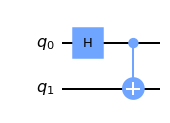

In [145]:
# Step 1)
# Creating two bit Bell state with intial states to be in |0>

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw()

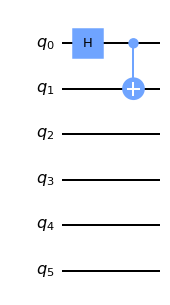

In [146]:
#Step 2) - Ideal or error free state
#Expanding quantum circuit to add more qubits for encoding
# Adding arbitraty 1 qubit X gate before CNOT for q1 qubit. And identity operation for q0

qc = QuantumCircuit(6)
qc.h(0)
qc.cx(0,1)
qc.draw()


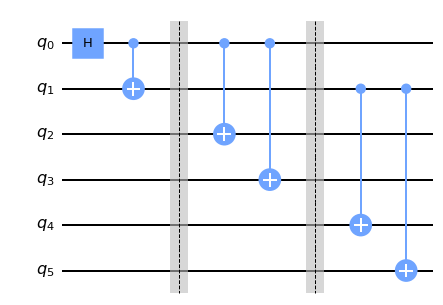

In [147]:
#Step 3
# Encode q0 qubit with two more (q2 & q3) |0> qubits for bit flip code

qc.barrier()
qc.cx(0,2)
qc.cx(0,3)

# Encode q1 qubit with two more (q4 & q5) |0> qubits for bit flip code

qc.barrier()
qc.cx(1,4)
qc.cx(1,5)

# Draw quantum circuit
qc.draw()

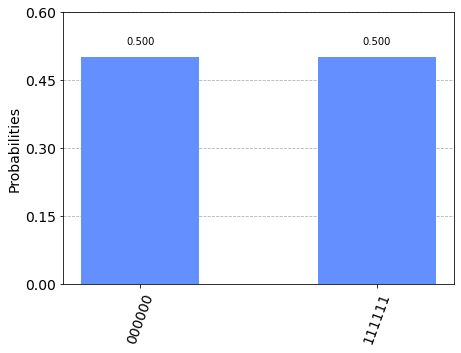

In [148]:
# Ideal error free bell state for |00> state
qc.measure_all()
backend = Aer.get_backend('qasm_simulator')
res = execute(qc, backend, shots=1024).result()
plot_histogram(res.get_counts(qc))

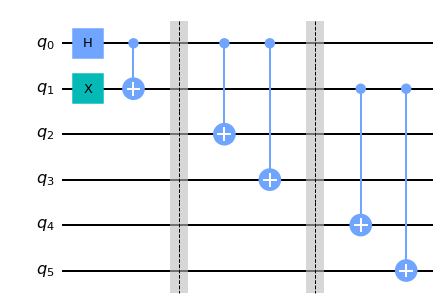

In [149]:
# Now Introduce the error in step 2 and obtain the measurements. Assumption is to have bit flip error gate (x) on q1
# No error or identity for q0
# Assumption is either zero or only 1 bit flip is occuring in the system

qc = QuantumCircuit(6)
qc.h(0)
qc.x(1)  #(100% error introduced in q1 qubit)
qc.cx(0,1)
qc.barrier()
qc.cx(0,2)
qc.cx(0,3)

# Encode q1 qubit with two more (q4 & q5) |0> qubits for bit flip code

qc.barrier()
qc.cx(1,4)
qc.cx(1,5)

# Draw quantum circuit
qc.draw()

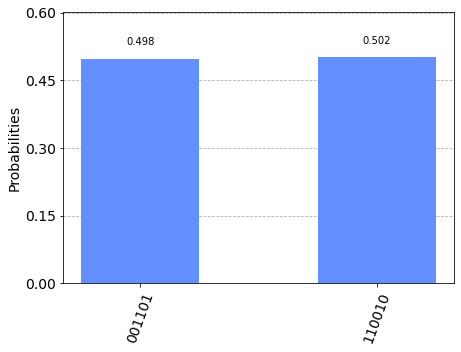

In [150]:
qc.measure_all()
backend = Aer.get_backend('qasm_simulator')
res = execute(qc, backend, shots=1024).result()
plot_histogram(res.get_counts(qc))

We observe that if q1 bit is flipped |0> to |1> than our system is equivalent to |01> Bell states, instead of |00> Bell state in ideal (error free) condition. 

Code correcton:- 

Error state:
On measurement of q2 to q5 if we observe any mixed states other than |XX0000> or |XX1111>, (here XX can be either 0 or 1, for q0 and q1), we know q1 has had a bit flip dpending based on our initial assumption and we can execute q1.x(1) to reverse it.
Logically or classicaly we can execute XOR for q2 to q5 measurements, and if XOR's output is 1, than q1 is flipped and we can execute:

q1.x(1)

Ideal state:
|000000> or |111111> - No errors and no correction to q1 needed.
